In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, median, mode

# Load data
path = r"C:\Users\user\Downloads\Data Analyst Interview_sample_ecommerce_transactions (1).csv"
df = pd.read_csv(path)



df.head()

,OrderID,OrderDate,CustomerID,CustomerName,Country,Product,Category,Quantity,UnitPrice,TotalPrice,PaymentMethod
0,ORD00001,2024-05-10,CUST2017,Customer_257,Canada,Sneakers,Clothing,4,1364.83,5459.32,PayPal
1,ORD00002,2024-05-15,CUST1042,Customer_44,Germany,Monitor,Electronics,9,924.6,8321.40,Credit Card
2,ORD00003,2023-05-30,CUST4149,Customer_54,UK,Jeans,Clothing,ten,none,11696.56,Bank Transfer
3,ORD00004,2023-07-23,CUST1882,Customer_80,Germany,T-shirt,Clothing,10,357.59,3575.90,Bank Transfer
4,ORD00005,32/13/2023,CUST9540,Customer_92,USA,Toaster,Home & Kitchen,8,739.19,5913.52,NaN


In [4]:
df.drop_duplicates()
# Step 2: Convert OrderDate to datetime (handle errors)
df["OrderDate"] =pd.to_datetime (df["OrderDate"], errors = "coerce")
df = df.dropna(subset=['OrderDate'])
# Step 3: Fix Quantity - convert to numeric, force errors to NaN
df["Quantity"]=pd.to_numeric(df["Quantity"], errors ="coerce")
# Step 4: Fix UnitPrice - convert to numeric
df["UnitPrice"]= pd.to_numeric(df["UnitPrice"], errors="coerce")
# Step 5: Drop rows where any of these critical values are missing or invalid
df_cleaned = df.dropna(subset=['OrderDate', 'Quantity', 'UnitPrice', 'PaymentMethod'])
# Step 6: Recalculate TotalPrice (to fix cases where original was wrong)
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Final cleaned preview
df_cleaned.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2396\2205462327.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


,OrderID,OrderDate,CustomerID,CustomerName,Country,Product,Category,Quantity,UnitPrice,TotalPrice,PaymentMethod
0,ORD00001,2024-05-10,CUST2017,Customer_257,Canada,Sneakers,Clothing,4.0,1364.83,5459.32,PayPal
1,ORD00002,2024-05-15,CUST1042,Customer_44,Germany,Monitor,Electronics,9.0,924.60,8321.40,Credit Card
3,ORD00004,2023-07-23,CUST1882,Customer_80,Germany,T-shirt,Clothing,10.0,357.59,3575.90,Bank Transfer
5,ORD00006,2024-01-30,CUST3882,Customer_203,UAE,Tennis Racket,Sports,1.0,43.31,43.31,Credit Card
6,ORD00007,2023-07-18,CUST4394,Customer_281,USA,Yoga Mat,Sports,6.0,836.56,5019.36,PayPal


In [5]:

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = df['UnitPrice'].astype(int) # Assuming no errors here

print("Descriptive statistics for numeric columns:")
print(df.describe())
# Check if the min/max values or the count (non-null entries) make sense after cleaning.

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# Top product lines
if 'Product' in df.columns:
    top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
    print("\nTop Product Lines by Quantity Sold:\n", top_products)


Top Product Lines by Quantity Sold:
 Product
Children's Book    175.0
Blender            170.0
Monitor            168.0
Dumbbells          153.0
Jacket             147.0
Science            131.0
T-shirt            130.0
Yoga Mat           129.0
Sneakers           128.0
Headphones         116.0
Fiction            115.0
Football           108.0
Tennis Racket      103.0
Biography          102.0
Chair              101.0
Jeans               98.0
Lamp                92.0
Smartphone          87.0
Laptop              85.0
Toaster             76.0
Name: Quantity, dtype: float64


In [ ]:
# Top product categories by total sales
top_categories = df.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False)
print("\nTop Categories by Sales:\n", top_categories)


Top Categories by Sales:
 Product
Children's Book    138052.07
Monitor            113615.86
Dumbbells          113602.25
Science            108676.52
Blender            106519.12
T-shirt            102979.99
Football           102408.44
Jacket             101054.46
Fiction             96062.04
Sneakers            85186.37
Headphones          82422.19
Jeans               80774.97
Biography           78716.28
Smartphone          78313.80
Chair               75377.40
Yoga Mat            74720.19
Tennis Racket       74232.43
Lamp                68416.18
Laptop              65390.95
Toaster             50389.86
Name: TotalPrice, dtype: float64


In [ ]:
# Monthly sales trend
# Add Year-Month column for time-based analysis

monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()
print("\nMonthly Sales Trend:\n", monthly_sales)



Monthly Sales Trend:
 YearMonth
2023-01    107293.66
2023-02    140181.16
2023-03     79842.84
2023-04     73458.45
2023-05     97168.26
2023-06     54353.97
2023-07    115548.63
2023-08    108733.38
2023-09    105835.91
2023-10     72728.92
2023-11    117988.44
2023-12     71643.05
2024-01    109290.12
2024-02     94497.35
2024-03     99496.46
2024-04    111681.82
2024-05    126306.14
2024-06    110862.81
Freq: M, Name: TotalPrice, dtype: float64


In [ ]:
# Payment methods distribution
payment_counts = df['PaymentMethod'].value_counts()
print("\nPayment Method Usage:\n", payment_counts)


Payment Method Usage:
 PaymentMethod
Cash on Delivery    119
PayPal              112
Bank Transfer       110
Credit Card         100
Name: count, dtype: int64


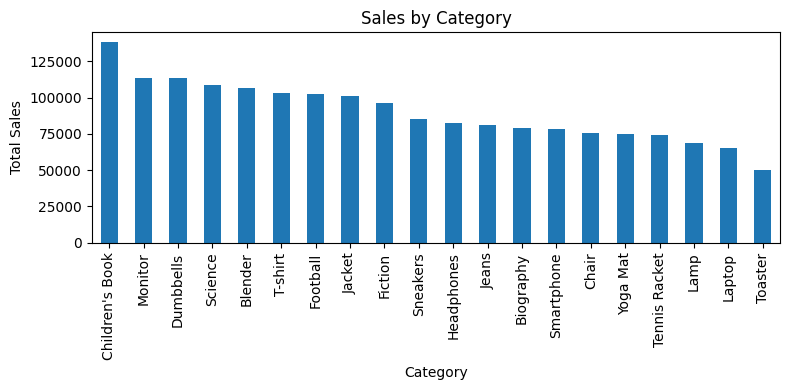

In [ ]:
# Sales by Category
top_categories.plot(kind='bar', title='Sales by Category', ylabel='Total Sales', xlabel='Category', figsize=(8,4))
plt.tight_layout()
plt.show()

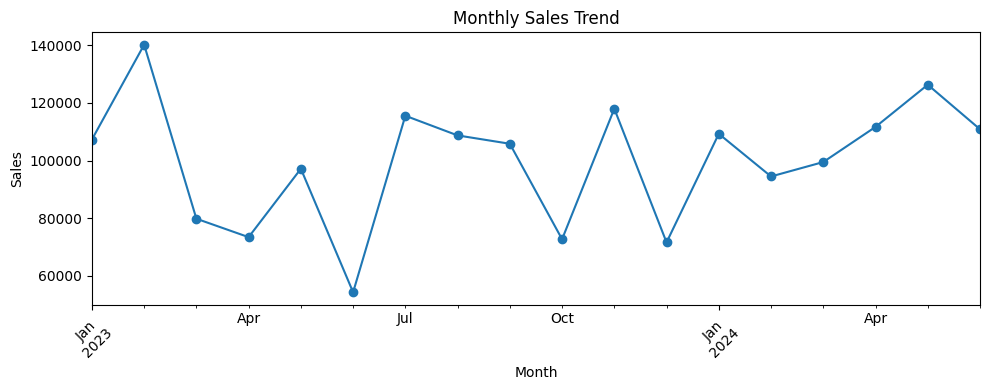

In [ ]:
# Monthly Sales Trend
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', ylabel='Sales', xlabel='Month', figsize=(10,4))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

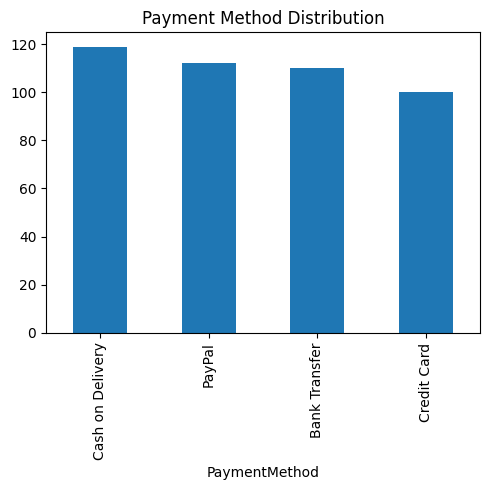

In [ ]:
# Payment Method Distribution
payment_counts.plot(kind='bar', title='Payment Method Distribution', figsize=(5,5))
plt.ylabel("")
plt.tight_layout()
plt.show()

In [6]:
df_cleaned.to_csv(r"C:\Users\user\Desktop\data analysis project\datasets\clean.csv", index=False)

In [ ]:
# Monthly sales trend
monthly_sales = df_cleaned.groupby('YearMonth')['TotalPrice'].sum().reset_index()
print("Monthly Sales:")
print(monthly_sales)


Monthly Sales:
   YearMonth  TotalPrice
0    2023-01    107208.0
1    2023-02    140090.0
2    2023-03     79775.0
3    2023-04     73387.0
4    2023-05     97116.0
5    2023-06     54301.0
6    2023-07    115470.0
7    2023-08    108656.0
8    2023-09    105768.0
9    2023-10     72679.0
10   2023-11    117917.0
11   2023-12     71580.0
12   2024-01    109196.0
13   2024-02     94432.0
14   2024-03     99439.0
15   2024-04    111613.0
16   2024-05    126203.0
17   2024-06    110774.0


In [ ]:
# Top categories by sales
top_categories = df_cleaned.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False)
print("\nTop Categories by Sales:")
print(top_categories)



Top Categories by Sales:
Category
Books             421225.0
Clothing          369729.0
Sports            364704.0
Electronics       339487.0
Home & Kitchen    300459.0
Name: TotalPrice, dtype: float64


In [ ]:
# Sales by country
sales_by_country = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print("\nSales by Country:")
print(sales_by_country)


Sales by Country:
Country
UK         358757.0
UAE        352346.0
Germany    328461.0
USA        306588.0
Canada     232910.0
India      216542.0
Name: TotalPrice, dtype: float64


In [ ]:
# Number of unique customers
unique_customers = df_cleaned['CustomerID'].nunique()
print(f"Number of Unique Customers: {unique_customers}")


Number of Unique Customers: 434


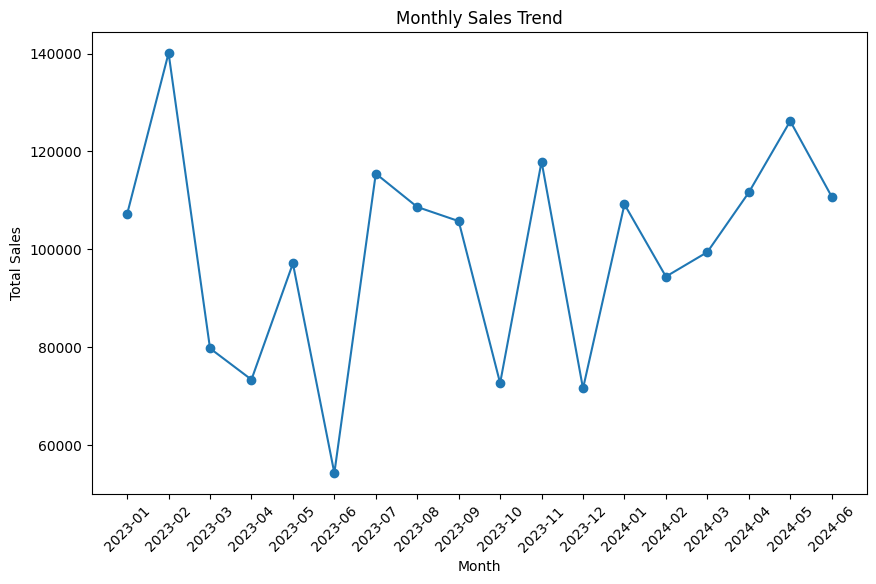

In [ ]:
# Visualizations for Dashboard (Step 4)
# Monthly Sales Trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['TotalPrice'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
